### Construction of B-Spline Basis Functions

B-Spline Basis Functions are a computationally efficient and equivalent representation of continous piecewise polynomials, commonly known as Splines. These are defined recursively as

$$B_{i,0}(x) = \begin{cases} 1 & \text{if } x_i \leq x < x_{i+1} \\ 0 & \text{otherwise} \end{cases}$$

$$B_{i,k}(x) = \frac{x-x_i}{x_{i+k}-x_i}B_{i,k-1}(x) + \frac{x_{i+k+1}-x}{x_{i+k+1}-x_{i+1}}B_{i+1,k-1}(x)$$

where $x_i$ and $x_{i+1}$ are the knots of the spline. The $B_{i,k}$ are called B-Spline Basis Functions of degree $k$.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from b_spline_basis import B_Spline_Basis
from regression_spline_estimator import Regression_Spline_Estimator

### Let's generate some data and equally spaced knots

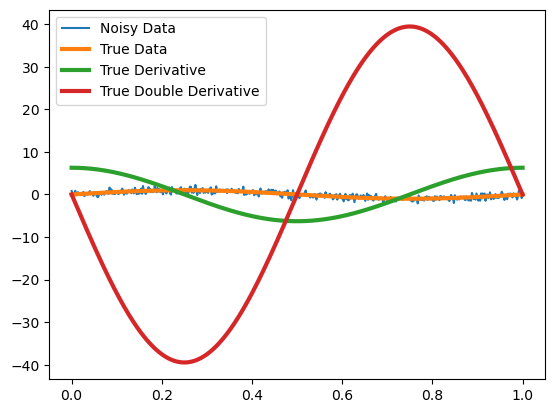

In [84]:
x=np.linspace(0,1,500)
y=np.sin(2*np.pi*x)
derivative=2*np.pi*np.cos(2*np.pi*x)
double_derivative=-4*np.pi**2*np.sin(2*np.pi*x)
noisy=y+np.random.normal(0,0.5,500)
gamma=np.linspace(0.25,0.75,5)
gamma_eval=np.sin(2*np.pi*gamma)
plt.plot(x,noisy, label='Noisy Data')
plt.plot(x,y, label='True Data',lw=3)
plt.plot(x,derivative, label='True Derivative',lw=3)
plt.plot(x,double_derivative, label='True Double Derivative',lw=3)
plt.legend()



In [85]:
print(f"Knots = {gamma}")

Knots = [0.25  0.375 0.5   0.625 0.75 ]


### Initiate an instance of B-Spline Basis Functions

Here the B-spline basis functions are callable given a set of design points. The basis functions are evaluated at the design points and the resulting matrix is returned which is shape N x (K+M)

In [86]:
basis=B_Spline_Basis(x,gamma,order=3)

In [87]:
gamma

array([0.25 , 0.375, 0.5  , 0.625, 0.75 ])

In [88]:
eval_basis=basis.B(x,m=4)
eval_basis.shape

(500, 9)

### Visualize the density of our matrix

In general this design matrix is of the size N x (K+M) where N is the number of observations, K is the size of the knot vector and M is the degree of the spline. 

The number of columns is the number of basis functions. The number of rows is the number of observations. 

In the case of smoothing splines; this simplifies to N x (N+4)

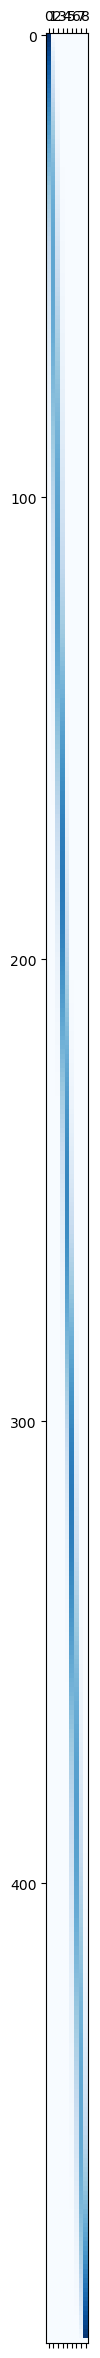

In [89]:
fig,ax=plt.subplots(1,1,figsize=(12,30))

ax.matshow(eval_basis, cmap=plt.cm.Blues)

Note the above is a banded matrix which we can take advantage of when inverting. Applying the cholesky decomposition to the matrix is computationally efficient. We can then solve for the remaining linear system

In [90]:
regularized_basis=eval_basis.T@eval_basis+np.eye(eval_basis.shape[1])*0.01

L=np.linalg.cholesky(regularized_basis)
LT=L.T

beta=np.linalg.solve(L@LT,eval_basis.T@noisy)
beta.shape



(9,)

### Solve for the solution vector and visualize the basis functions

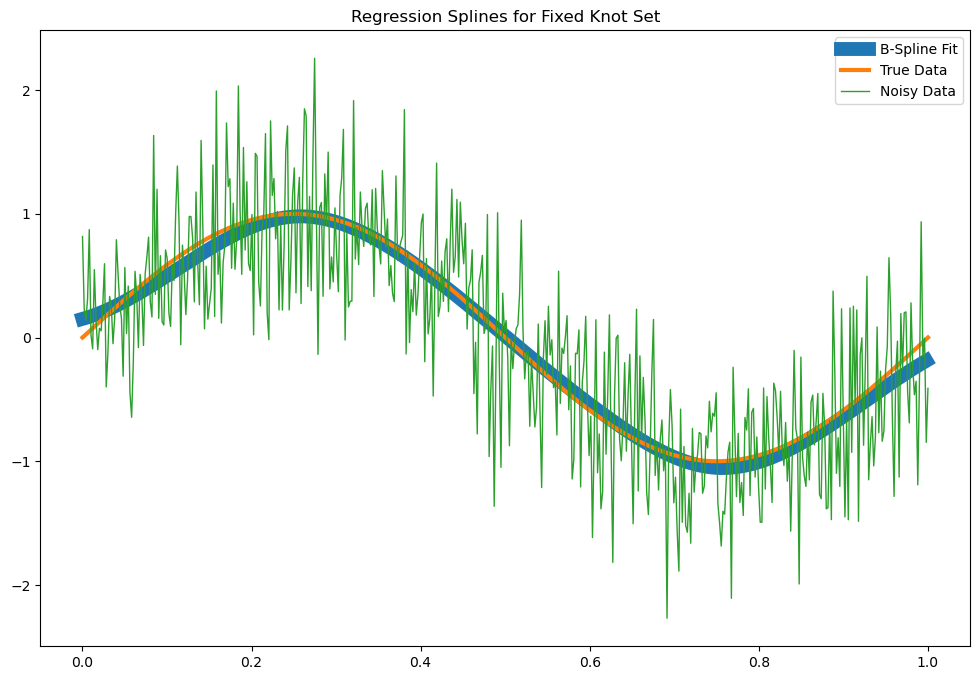

In [91]:
fig,ax=plt.subplots(1,1,figsize=(12,8))

ax.set_title('Regression Splines for Fixed Knot Set')

ax.plot(x[:-1],basis.B(x[:-1],m=4)@beta, label='B-Spline Fit',lw=10)

ax.plot(x,y, label='True Data',lw=3)
ax.plot(x,noisy, label='Noisy Data',lw=1)

ax.legend()

### Regression Spline Estimator

In [92]:
spline=Regression_Spline_Estimator(x,noisy,gamma,order=3,lambda_=0.01)

In [93]:
spline.gamma.shape

(9, 1)

In [94]:
estimate=spline.fit()[1]

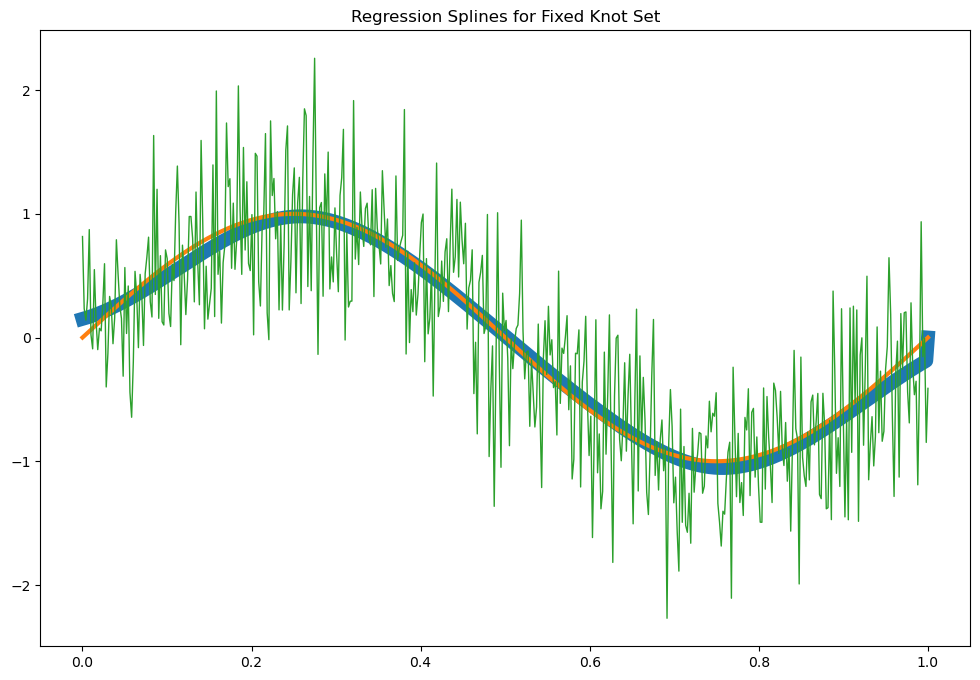

In [95]:
fig,ax=plt.subplots(1,1,figsize=(12,8))

ax.set_title('Regression Splines for Fixed Knot Set')

ax.plot(x,estimate, label='B-Spline Fit',lw=10)

ax.plot(x,y, label='True Data',lw=3)
ax.plot(x,noisy, label='Noisy Data',lw=1)


### Arbitrary Prediction

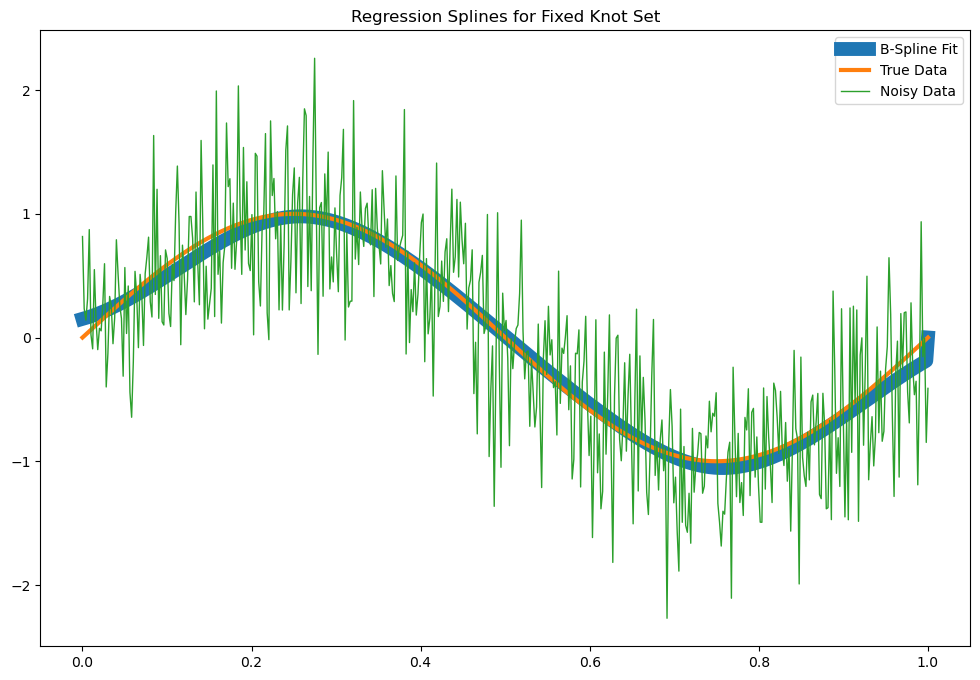

In [96]:
fig,ax=plt.subplots(1,1,figsize=(12,8))

ax.set_title('Regression Splines for Fixed Knot Set')

ax.plot(x,spline.predict(x), label='B-Spline Fit',lw=10)

ax.plot(x,y, label='True Data',lw=3)
ax.plot(x,noisy, label='Noisy Data',lw=1)

ax.legend()


In [97]:
from spline_derivative import compute_spline_derivative

In [98]:
spline_prime=compute_spline_derivative(spline,order=1)


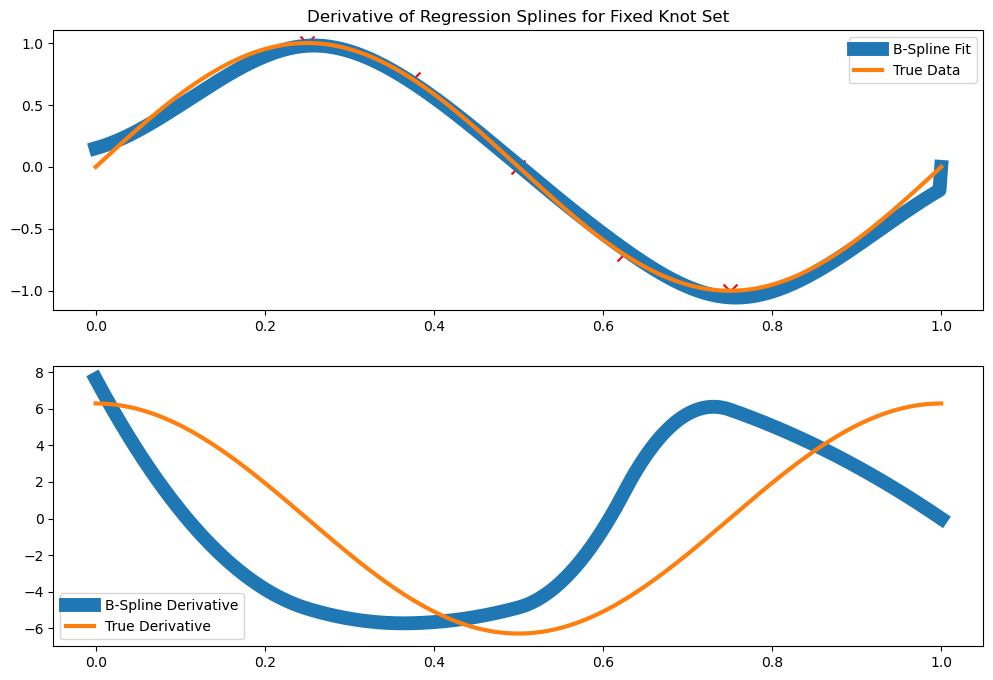

In [99]:
fig,ax=plt.subplots(2,1,figsize=(12,8))

ax[0].set_title('Derivative of Regression Splines for Fixed Knot Set')

ax[0].plot(x,spline.f_hat, label='B-Spline Fit',lw=10)
ax[0].scatter(gamma,gamma_eval,marker='x',c='r',s=100)
ax[0].plot(x,y, label='True Data',lw=3)
ax[0].legend()

ax[1].plot(x,spline_prime.y, label='B-Spline Derivative',lw=10)

ax[1].plot(x,derivative, label='True Derivative',lw=3)
ax[1].legend()


### Higher order Derivatives

In [100]:
spline_double_prime=compute_spline_derivative(spline=spline, order=2)

In [101]:
spline_double_prime.order

1

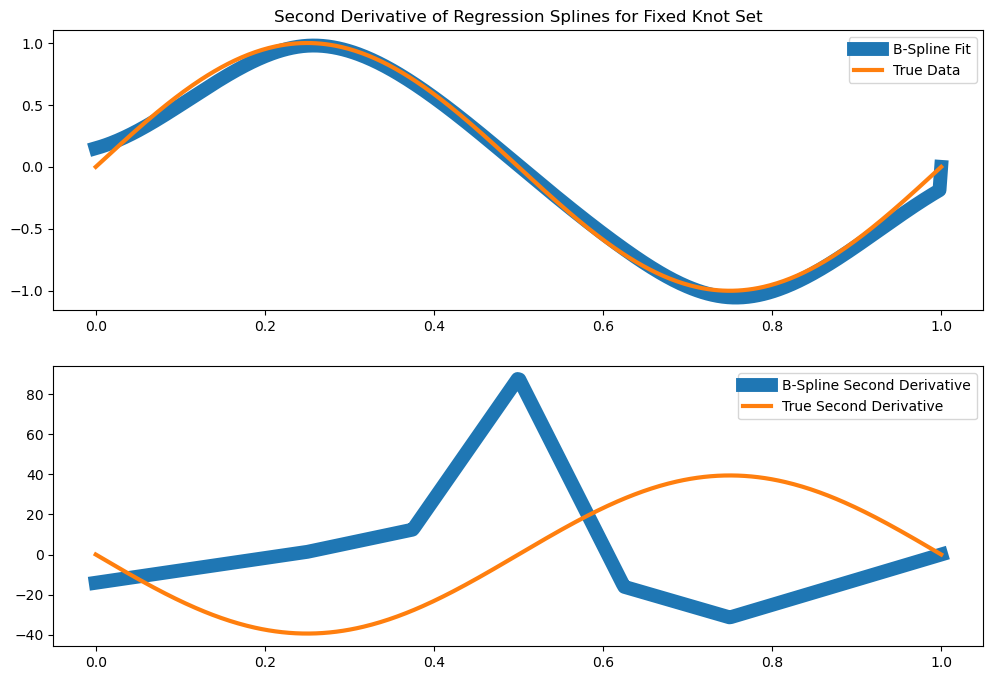

In [102]:


fig,ax=plt.subplots(2,1,figsize=(12,8))

ax[0].set_title('Second Derivative of Regression Splines for Fixed Knot Set')

ax[0].plot(x,spline.f_hat, label='B-Spline Fit',lw=10)

ax[0].plot(x,y, label='True Data',lw=3)
ax[0].legend()

ax[1].plot(x,spline_double_prime.f_hat, label='B-Spline Second Derivative',lw=10)

ax[1].plot(x,double_derivative, label='True Second Derivative',lw=3)
ax[1].legend()

